In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# Ingresamos la URL con los parámetros que nos interesan
url_api = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01210PM/html/2022-10/2023-05/esp'

In [3]:
# Hacemos el requerimiento a la API
response  = requests.get(url_api)
contenido_html = response.text
soup = BeautifulSoup(contenido_html)

In [31]:
# Imprimimos el HTML para analizarlo y decidir cómo extraer la data
print(contenido_html)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es" lang="es">
<head>
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="viewport" content="width=device-width, initial-scale=1.0"> 

<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<script> if(top == self) { document.documentElement.style.display='block'}
else { top.location = self.location; } </script>



<link href="/estadisticas/series/css/ajax_upload.css" media="screen" rel="stylesheet" type="text/css" />
<link href="/estadisticas/series/css/jquery-1.7.2.css" media="screen" rel="stylesheet" type="text/css" />



<link href="/estadisticas/series/css/series-estadisticas.css?20230813010132" media="screen" rel="stylesheet" type="text/css" />
<link href="/estadisticas/series/css/estilo.css?20230813010132" media="screen" rel="stylesheet" type="text/css" />

<!--[if lt IE 9]>
	<link href="/estadisticas/series/css/series-estadisticas-ie.css" media="screen" rel="stylesheet" type="text/css" />
	<link 

In [6]:
# Obtenemos la etiqueta td de class periodo
resultados = soup.find('div', class_="barra-resultados")
periodos = resultados.find_all('td', class_="periodo")

In [9]:
# Iteramos para almacenar los nombres de los meses en una lista
fechas = []
for periodo in periodos:
    fechas.append(
        periodo.find('b').text
    )

In [10]:
fechas

['Oct22', 'Nov22', 'Dic22', 'Ene23', 'Feb23', 'Mar23', 'Abr23', 'May23']

In [11]:
# Obtenemos las etiquetas td de class dato
tasas = resultados.find_all('td', class_="dato")

In [13]:
# Iteramos para almacenar las tasas de cambio en una lista
tcs = []
for tasa in tasas:
    tcs.append(
        tasa.text.replace('\n', '').replace('\r', '').replace(' ', '')
    )

In [29]:
tcs

['3.979', '3.877', '3.829', '3.833', '3.841', '3.780', '3.766', '3.689']

In [44]:
titulo = resultados.find('th', abbr='series').text
titulo

'Tipo de cambio - promedio del periodo (S/ por US$) - Bancario - Promedio'

In [24]:
# Creamos una serie de Pandas con las tasas de cambio
serie1 = pd.Series(tcs)
serie1

0    3.979
1    3.877
2    3.829
3    3.833
4    3.841
5    3.780
6    3.766
7    3.689
dtype: object

In [25]:
# Indexamos la serie, la nombramos y cambiamos el tipo de datos de sus elementos
serie1.index = fechas
serie1.name = 'Tasas de cambio'
serie1 = serie1.astype(float)
serie1

Oct22    3.979
Nov22    3.877
Dic22    3.829
Ene23    3.833
Feb23    3.841
Mar23    3.780
Abr23    3.766
May23    3.689
Name: Tasas de cambio, dtype: float64

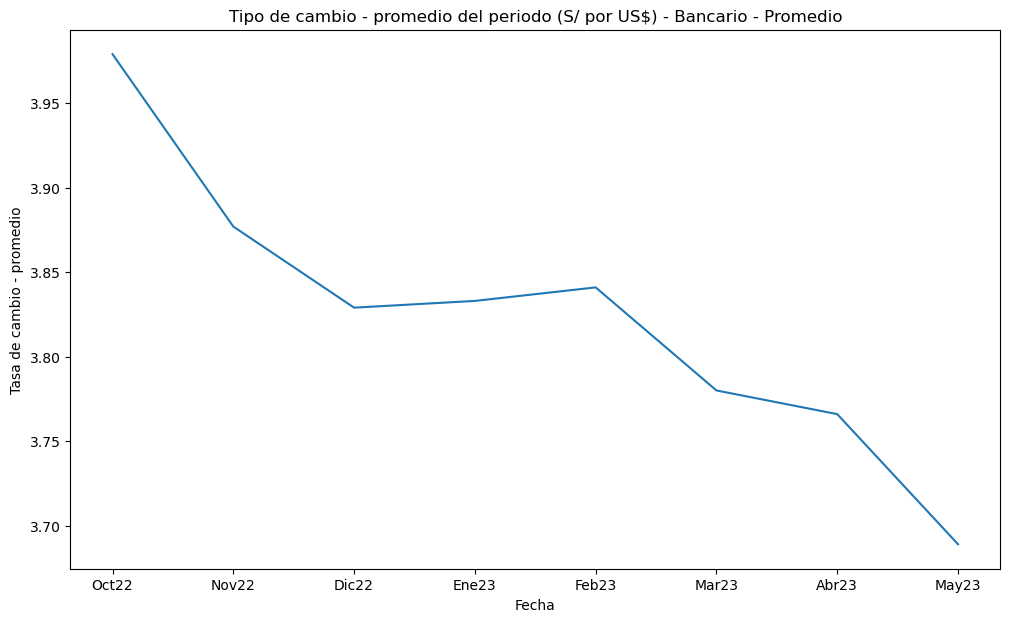

In [47]:
# Graficamos la serie para analizar la tendencia
plt.figure(figsize=(12, 7))

plt.plot(serie1.index, serie1)

plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio - promedio')
plt.title(titulo)
plt.show()